In [808]:
import glob
import cv2 as cv
import numpy as np
import imutils
from matplotlib import pyplot as plt

In [893]:
PATH = 'C:/Users/ADmin/Desktop/drum/music_sheet/'
img = cv.imread(PATH+'/7.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [894]:
#img = cv.imread('C:/Users/ADmin/Desktop/line.jpg')
#img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

In [895]:
#glob.glob(PATH+'*.jpg')

In [896]:
print(img)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [897]:
start = cv.imread('C:/Users/ADmin/Desktop/start.jpg')
start = cv.cvtColor(start, cv.COLOR_BGR2GRAY)

start_w,start_h = start.shape[::-1]

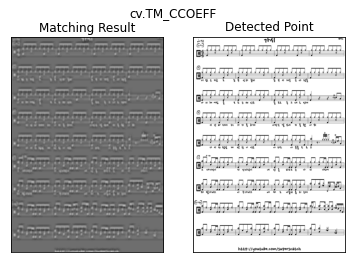

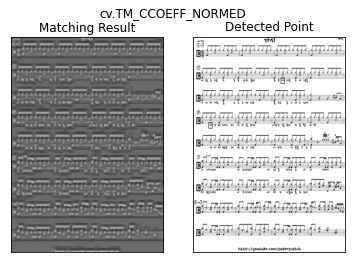

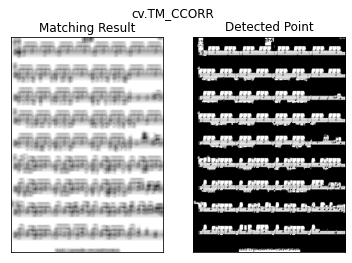

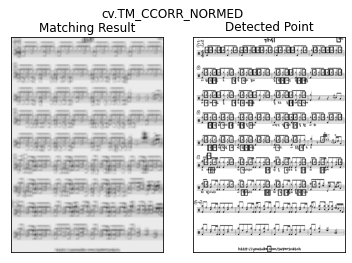

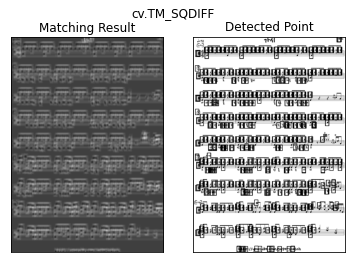

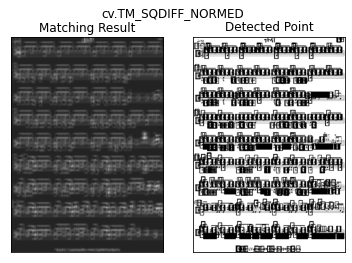

In [909]:
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img2 = img.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv.matchTemplate(img2,start,method)
    cv.normalize(res,res,0,1, norm_type=cv.NORM_MINMAX)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        threshold = 0.1
        loc = np.where(res <= threshold)
        for pt in zip(*loc[::-1]):
            cv.rectangle(img2, pt, (pt[0] + start_w, pt[1] + start_h), (0,0,0), 2)
    else:
        threshold = 0.95
        loc = np.where(res > threshold)
        for pt in zip(*loc[::-1]):
            cv.rectangle(img2, pt, (pt[0] + start_w, pt[1] + start_h), (0,0,0), 2)
        
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img2,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

(20, 80)
(20, 83)
(19, 84)
(20, 84)
(19, 206)
(20, 206)
(20, 209)
(19, 210)
(20, 210)
(20, 332)
(20, 335)
(19, 336)
(20, 336)
(20, 458)
(20, 461)
(19, 462)
(20, 462)
(731, 543)
(730, 544)
(731, 544)
(19, 584)
(20, 584)
(20, 585)
(19, 588)
(20, 588)
(19, 710)
(20, 710)
(20, 713)
(19, 714)
(20, 714)
(19, 836)
(20, 836)
(20, 837)
(19, 840)
(20, 840)
(19, 962)
(20, 962)
(20, 963)
(19, 966)
(20, 966)
(19, 1088)
(20, 1088)
(20, 1089)
(19, 1092)
(20, 1092)


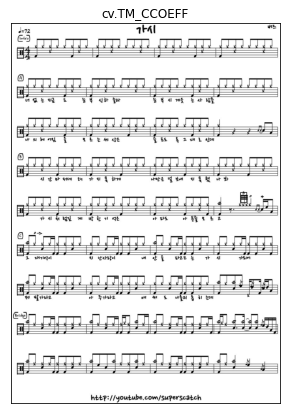

In [917]:
meth = 'cv.TM_CCOEFF'
method = eval(meth)
img2 = img.copy()
res = cv.matchTemplate(img2,start,method)
cv.normalize(res,res,0,1, norm_type=cv.NORM_MINMAX)

threshold = 0.9
loc = np.where(res > threshold)

point_w = []
point_h = []

for pt in zip(*loc[::-1]):
    cv.rectangle(img2, pt, (pt[0] + start_w, pt[1] + start_h), (0,0,255), 1)
    point_w.append(pt[0])
    point_h.append(pt[1])
    print(pt)

plt.figure(figsize=[10,7])
plt.imshow(img2,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.title(meth)
plt.show()

In [918]:
point_w

[20,
 20,
 19,
 20,
 19,
 20,
 20,
 19,
 20,
 20,
 20,
 19,
 20,
 20,
 20,
 19,
 20,
 731,
 730,
 731,
 19,
 20,
 20,
 19,
 20,
 19,
 20,
 20,
 19,
 20,
 19,
 20,
 20,
 19,
 20,
 19,
 20,
 20,
 19,
 20,
 19,
 20,
 20,
 19,
 20]

In [919]:
i = 1

while i < len(point_h):
    prev = point_h[i-1]
    post = point_h[i]

    if (post-prev < 30):
        del point_h[i-1]
        del point_w[i-1]
    else:
        i += 1

In [920]:
point_w, point_h , start_w, start_h

([20, 20, 20, 20, 731, 20, 20, 20, 20, 20],
 [84, 210, 336, 462, 544, 588, 714, 840, 966, 1092],
 20,
 32)

In [921]:
crops = []

for i in range(len(point_h)):
    
    s = point_h[i]-start_h//2
    e = point_h[i]+start_h
    
    crops.append(img[s:e,point_w[i]+start_w:img.shape[1]])

In [922]:
crops[2].shape

(48, 820)

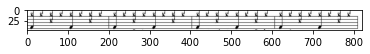

In [923]:
plt.imshow(crops[3], cmap='gray')

# Detection line of notes in crop images

In [924]:
crop_img = crops[3]

In [986]:
line = np.zeros([crop_img.shape[0],1])
padd = np.ones([crop_img.shape[0],1])

lines = np.hstack([padd, line, line, line, padd])
lines = lines.astype(np.uint8)

lines_w,lines_h = lines.shape[::-1]

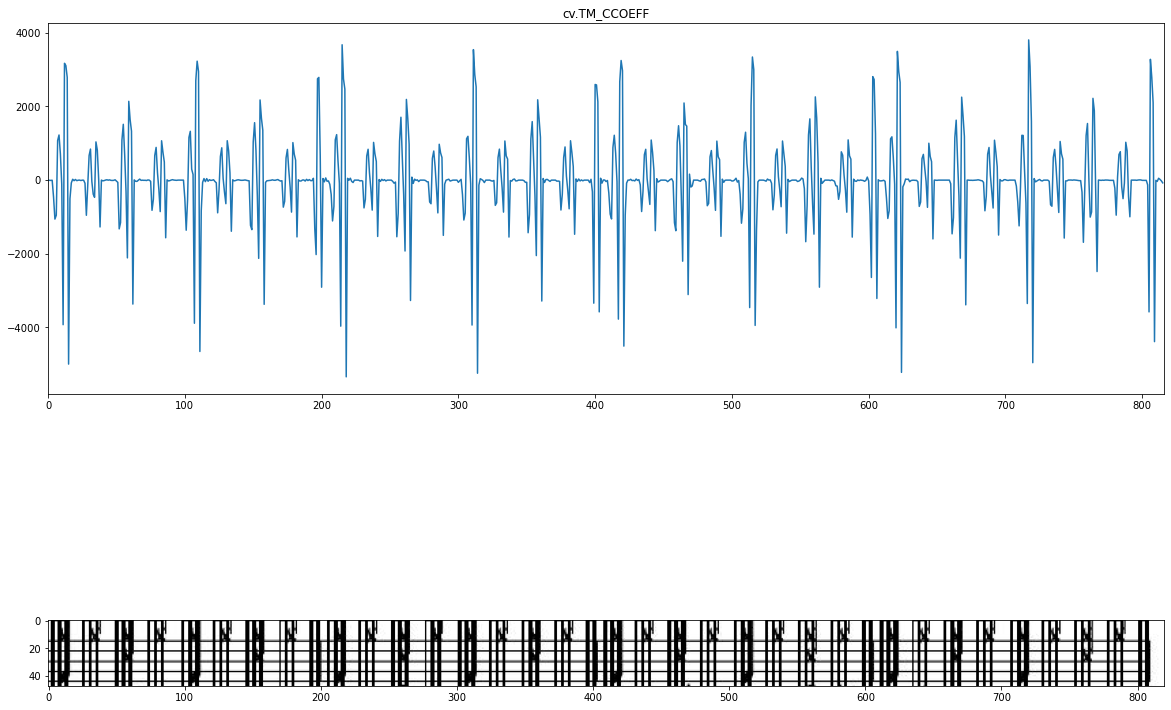

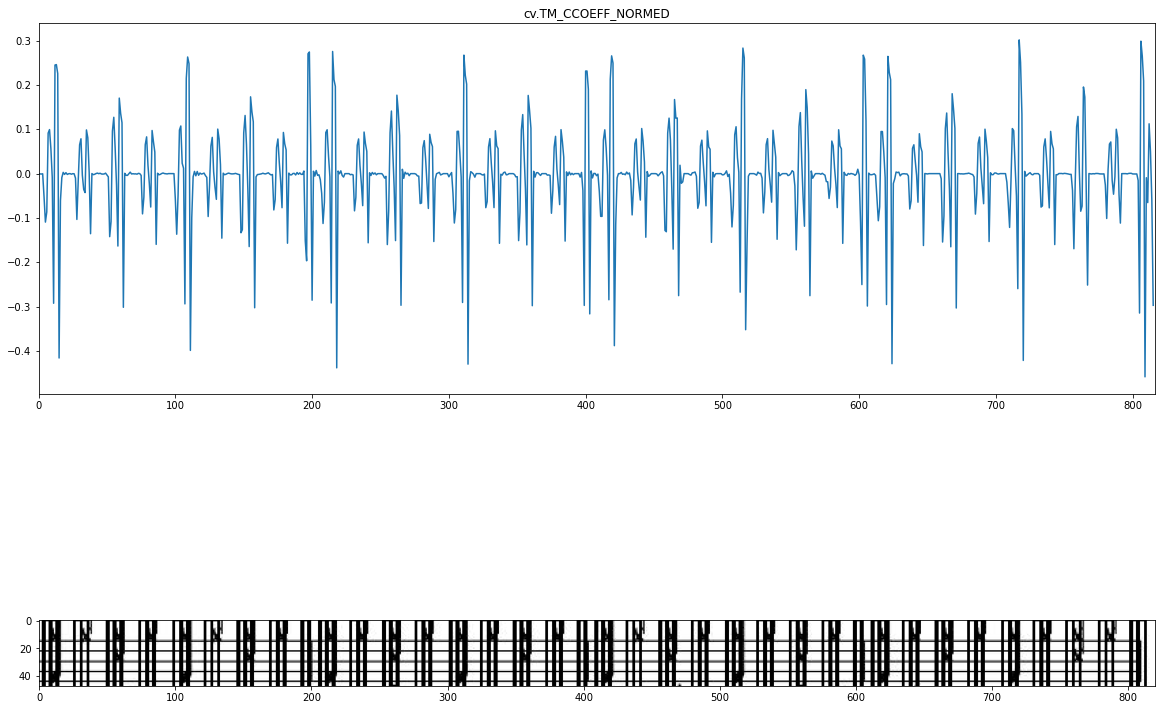

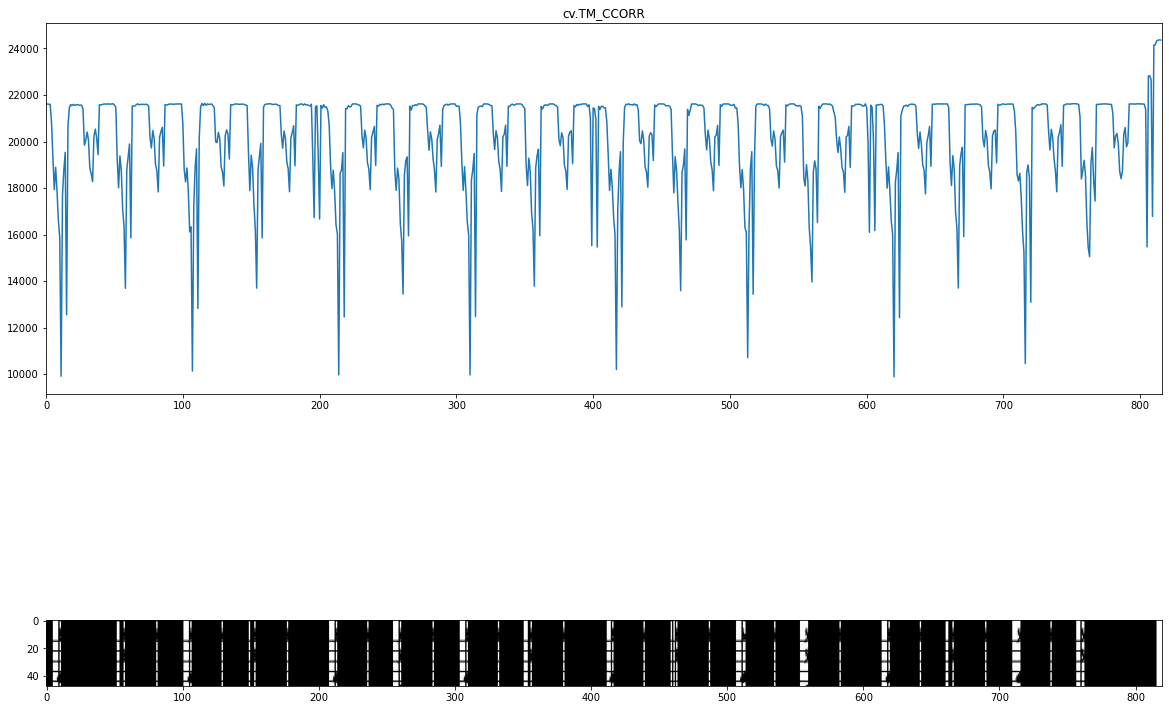

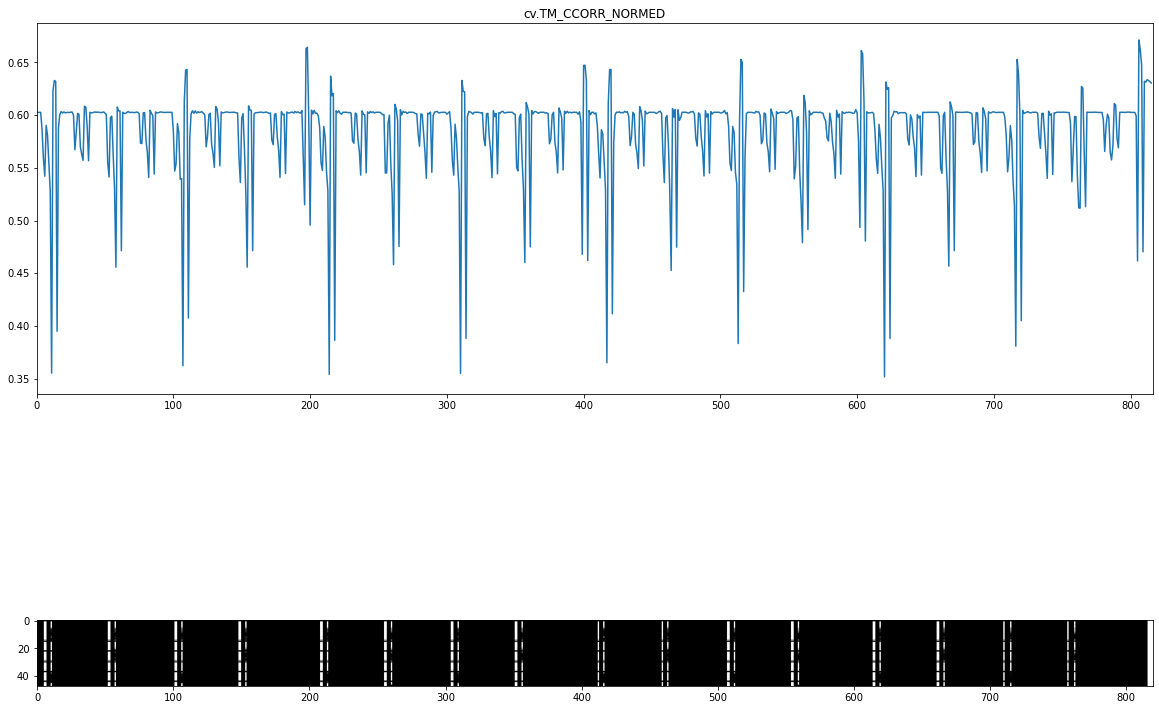

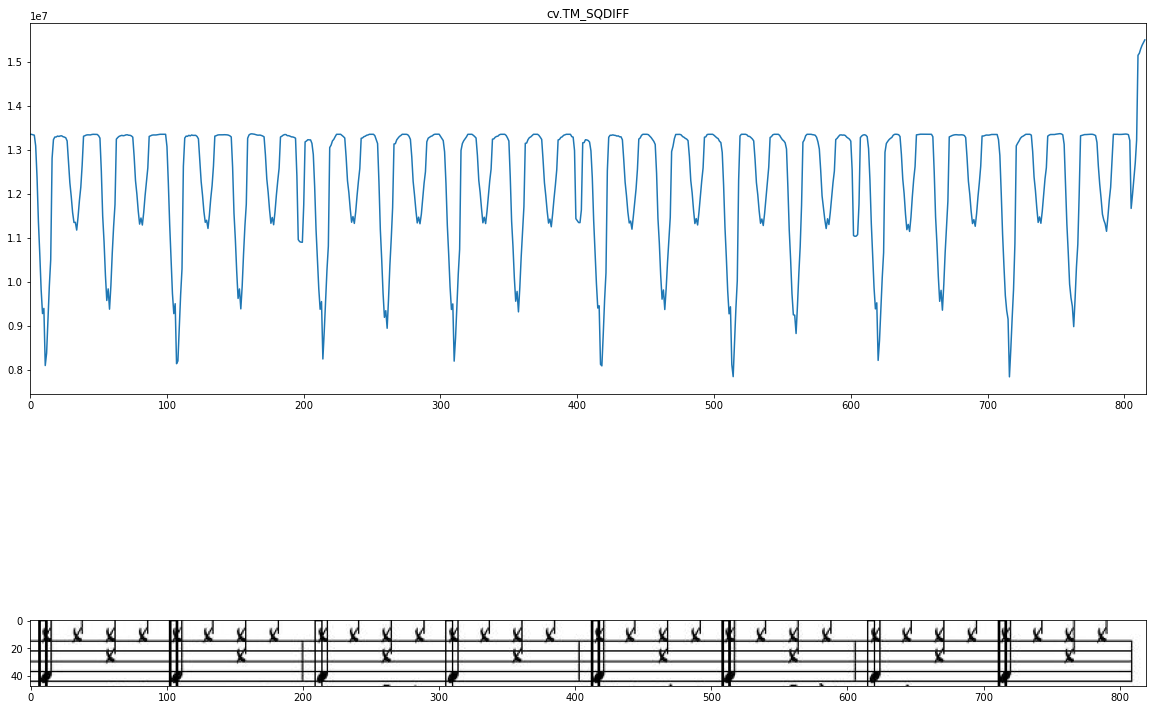

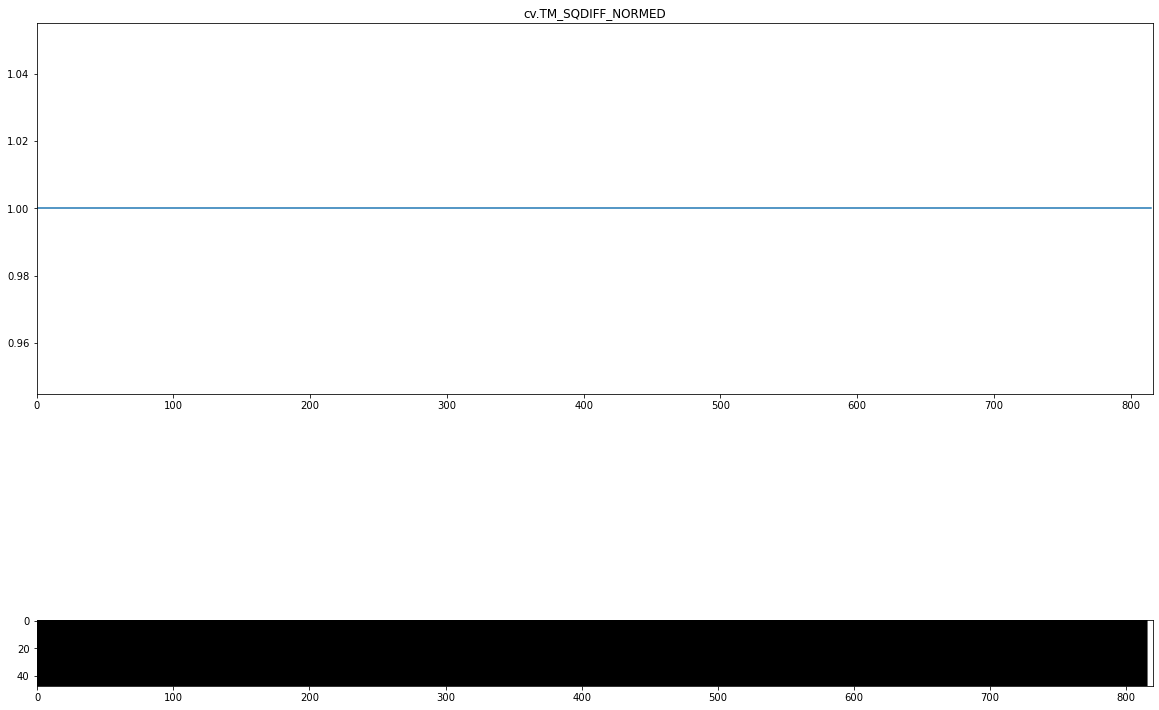

In [1136]:
# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img2 = crop_img.copy()
    method = eval(meth)

    # Apply template Matching
    res = cv.matchTemplate(img2,lines,method)
    res_norm = res.copy()
    cv.normalize(res,res_norm,0,1, norm_type=cv.NORM_MINMAX)

    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        threshold = 0.1
        loc = np.where(res_norm <= threshold)
        for pt in zip(*loc[::-1]):
            cv.rectangle(img2, pt, (pt[0]-5, pt[1] + lines_h), 0, 1)
    else:
        threshold = 0.65
        loc = np.where(res_norm > threshold)
        
        for pt in zip(*loc[::-1]):
            cv.rectangle(img2, pt, (pt[0]-5, pt[1] + lines_h), 0, 1)

    plt.figure(figsize=[20,15])

    plt.subplot(2,1,1), plt.plot(res.T)
    plt.xlim(0,len(res[0]))
    plt.title(meth)
    plt.subplot(2,1,2), plt.imshow(img2,cmap = 'gray')
    
    plt.show()

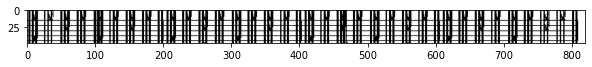

In [1137]:
meth = 'cv.TM_CCOEFF'
method = eval(meth)
crop_img2 = crop_img.copy()
res = cv.matchTemplate(crop_img2,lines,method)
cv.normalize(res,res_norm,0,1, norm_type=cv.NORM_MINMAX)

threshold = 0.6
loc = np.where(res_norm > threshold)

point_w = []
point_h = []

for pt in zip(*loc[::-1]):
    cv.rectangle(crop_img2, pt, (pt[0] - lines_w, pt[1] + lines_h), 0, 1)
    point_w.append(pt[0])
    point_h.append(pt[1])

plt.figure(figsize=[10,7])
plt.imshow(crop_img2,cmap = 'gray')
plt.show()

(0.0, 816.0)

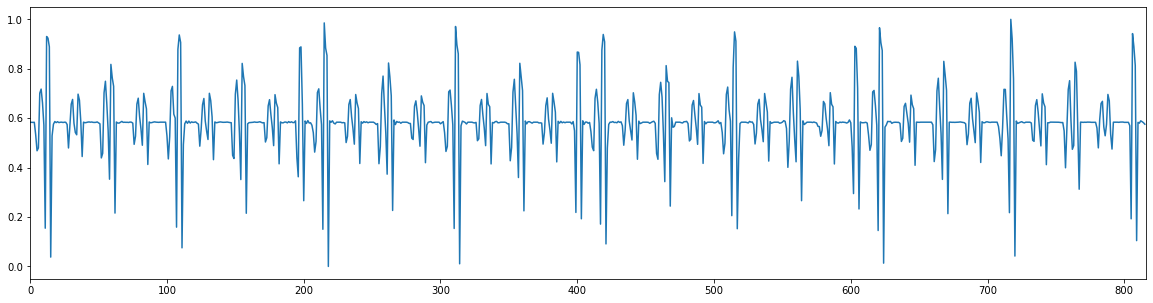

In [1138]:
plt.figure(figsize=[20,5])
profile = res_norm.T
plt.plot(profile)
plt.xlim(0,len(profile))

In [1139]:
prof = np.squeeze(profile, axis=1)

In [1145]:
import scipy
peaks,_ = scipy.signal.find_peaks(prof, height=0.65)

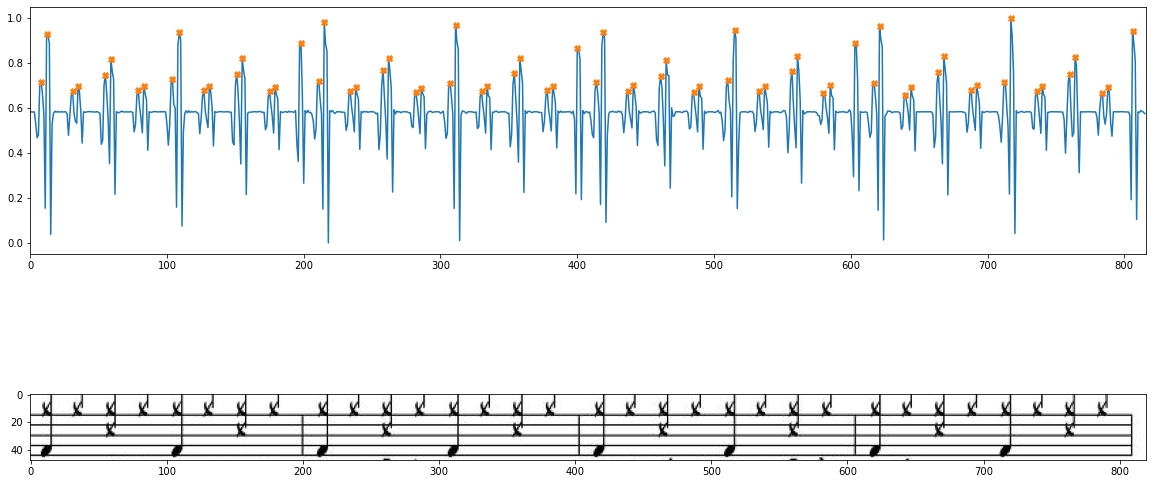

In [1141]:
plt.figure(figsize=[20,10])

plt.subplot(2,1,1),plt.plot(prof),plt.plot(peaks,prof[peaks],"X")
plt.xlim(0,len(smooth))
plt.subplot(2,1,2),plt.imshow(crop_img,cmap = 'gray')
plt.show()

In [1292]:
all_point = np.append(0, peaks, crop_img.shape[1])
all_point

array([  0,   8,  12,  31,  35,  55,  59,  79,  83, 104, 109, 127, 131,
       151, 155, 175, 179, 198, 211, 215, 234, 238, 258, 262, 282, 286,
       307, 311, 330, 334, 354, 358, 378, 382, 400, 414, 419, 437, 441,
       461, 465, 485, 489, 510, 515, 533, 537, 557, 561, 580, 585, 603,
       617, 621, 640, 644, 664, 668, 688, 692, 712, 717, 736, 740, 760,
       764, 784, 788, 806], dtype=int64)

In [1303]:
note_crops = []

all_point = np.append(0, peaks, crop_img.shape[1])

for i in range(len(peaks)):
    crops = crop_img[0:crop_img.shape[0],all_point[i]:all_point[i+1]]
    note_crops.append(crops)

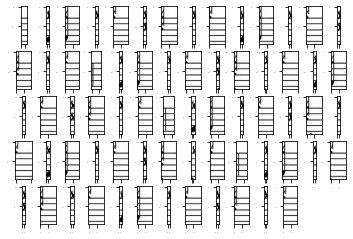

In [1304]:
for i in range(len(note_crops)):
    plt.subplot(5,len(note_crops)//5+1,i+1)
    plt.imshow(note_crops[i],cmap='gray')
    plt.xticks(fontsize=0.1)
    plt.yticks(fontsize=0.1)

In [1316]:
note_crops = []

all_point = np.append(0, peaks, crop_img.shape[1])

for i in range(len(peaks)):
    if (all_point[i+1]-all_point[i]<8):
        crops = crop_img[0:crop_img.shape[0],all_point[i]-5:all_point[i+1]+5]
    else:
        continue
    note_crops.append(crops)

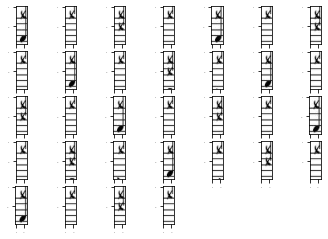

In [1317]:
for i in range(len(note_crops)):
    plt.subplot(5,len(note_crops)//5+1,i+1)
    plt.imshow(note_crops[i],cmap='gray')
    plt.xticks(fontsize=0.1)
    plt.yticks(fontsize=0.1)

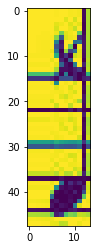

In [1320]:
plt.imshow(note_crops[0])

In [1321]:
note_on_line = cv.Sobel(note_crops[0],cv.CV_64F, 0, 1, ksize=1)
note_on_line = cv.convertScaleAbs(note_on_line)

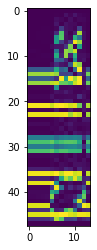

In [1323]:
plt.imshow(note_on_line)